In [3]:
import pandas as pd
import numpy as np

# Set number of rows
num_rows = 750
np.random.seed(101)

# Generate synthetic data
sizes = np.random.normal(loc=1500, scale=300, size=num_rows).astype(int)
rooms = np.random.randint(2, 7, size=num_rows)
locations = np.random.choice(['urban', 'suburban', 'rural'], size=num_rows, p=[0.5, 0.3, 0.2])

# Price calculation with location factor
location_factor = {'urban': 1.3, 'suburban': 1.1, 'rural': 0.9}
base_prices = sizes * 100 + rooms * 10000
location_adjusted_prices = [base_prices[i] * location_factor[locations[i]] for i in range(num_rows)]
prices = np.array(location_adjusted_prices) + np.random.normal(0, 20000, num_rows)

# Create DataFrame
df = pd.DataFrame({
    'Size': sizes,
    'Location': locations,
    'Number of Rooms': rooms,
    'Price': prices.astype(int)
})

# Save to CSV
df.to_csv('HousePrices.csv', index=False)
print("Dataset saved as HousePrices.csv")


Dataset saved as HousePrices.csv


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("HousePrices.csv")
# Explore data
print("Shape:", data.shape)
print("\nInfo:\n")
data.info()
# Check missing values
print("\nMissing Values:\n", data.isnull().sum())
# Handle missing data
for col in ['Size', 'Number of Rooms', 'Price']:
    data[col].fillna(data[col].median(), inplace=True)
data['Location'].fillna(data['Location'].mode()[0], inplace=True)

Shape: (750, 4)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             750 non-null    int64 
 1   Location         750 non-null    object
 2   Number of Rooms  750 non-null    int64 
 3   Price            750 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 23.6+ KB

Missing Values:
 Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


C:\ProgramData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


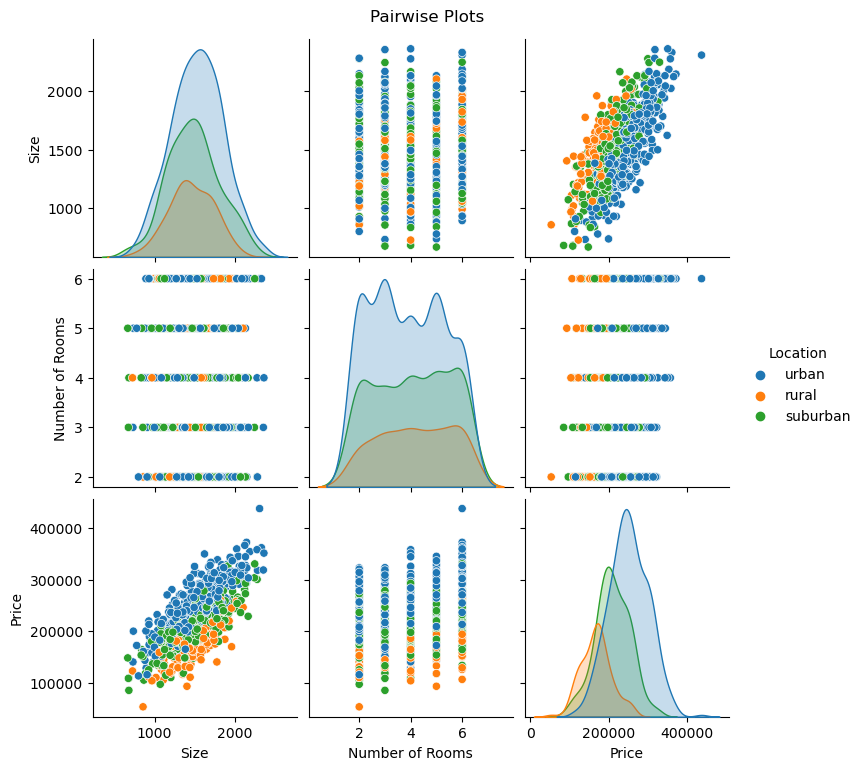

In [5]:
# Visualize distribution
sns.pairplot(data, hue='Location')
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

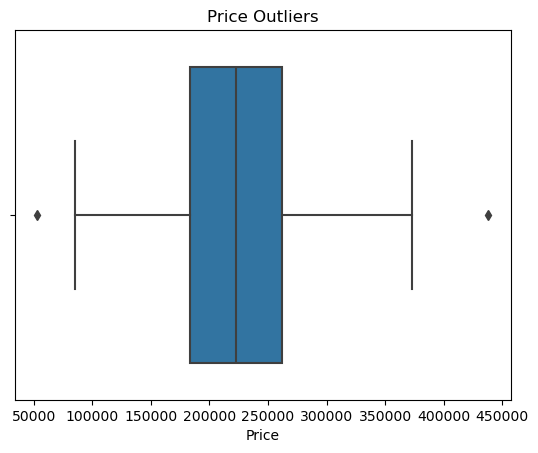

In [6]:
# Outliers in Price
sns.boxplot(data=data, x="Price")
plt.title("Price Outliers")
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# Separate features and target
features = data.drop(columns='Price')
target = data['Price']

# Create preprocessor with make_column_transformer
preprocessor = make_column_transformer(
    (StandardScaler(), ['Size', 'Number of Rooms']),
    (OneHotEncoder(drop='first'), ['Location'])
)

# Apply transformation
features_transformed = preprocessor.fit_transform(features)

# Display transformed shape
print("Transformed Features Shape:", features_transformed.shape)


Transformed Features Shape: (750, 4)


Correlation with Price:
 Price              1.000000
Size               0.723569
Number of Rooms    0.252518
Name: Price, dtype: float64


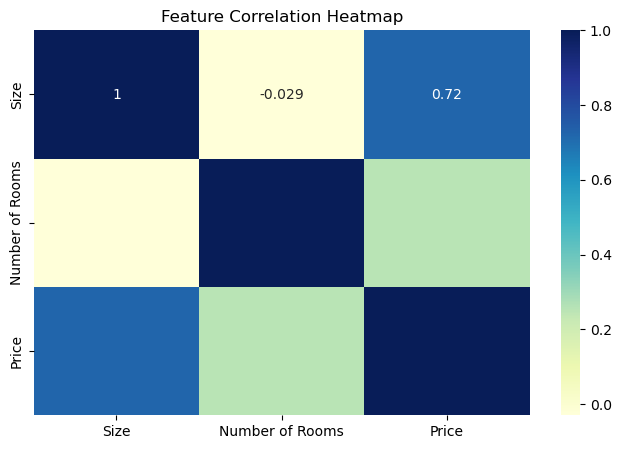

In [9]:
# Simple correlation check
corr_matrix = data.corr(numeric_only=True)
print("Correlation with Price:\n", corr_matrix['Price'].sort_values(ascending=False))

# Optional: Display heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    features_transformed, target, test_size=0.2, random_state=1)

# Train linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Model Trained Successfully")

Model Trained Successfully


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict
predictions = lr_model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Comparison of predictions
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": predictions
})
print("\nPrediction Comparison:\n", comparison.head())

RMSE: 23404.65
R² Score: 0.83

Prediction Comparison:
    Actual      Predicted
0  198090  177933.297830
1  211627  202372.503704
2  246967  268353.633150
3  255314  263877.877592
4  212885  213040.184906


In [12]:
# Extract feature names
encoded_columns = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(['Location'])
final_columns = ['Size', 'Number of Rooms'] + list(encoded_columns)

# Combine coefficients with feature names
coef_data = pd.DataFrame({
    'Feature': final_columns,
    'Coefficient': lr_model.coef_
})

print("\nFeature Importance:\n", coef_data)



Feature Importance:
              Feature   Coefficient
0               Size  38487.145589
1    Number of Rooms  17030.126108
2  Location_suburban  38001.481571
3     Location_urban  77384.366832
